<a href="https://colab.research.google.com/github/Miguelflj/Imersao_dados_4ed/blob/main/aula_2_imersao_dados4ed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura: Imersão dados 4ª edição
> Aula 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
url_dados = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url_dados)

In [4]:
df.head(1)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000


In [5]:
df.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor'],
      dtype='object')

In [6]:
df['Valor'].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [7]:
df[['Moeda','Valor_Anunciado','Tipo_Anuncio']] = df['Valor'].str.split(expand=True)

In [8]:
df_vendas = df[df['Tipo_Anuncio'].isnull()]
df_vendas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anunciado,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [9]:
df_vendas['Valor_Anunciado'].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_Anunciado, Length: 9156, dtype: float64

In [10]:
df_vendas['Valor_Anunciado'] = df_vendas['Valor_Anunciado'].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rua              6107 non-null   object 
 1   Bairro           9146 non-null   object 
 2   Cidade           9156 non-null   object 
 3   Metragem         9156 non-null   int64  
 4   Quartos          9156 non-null   int64  
 5   Banheiros        9156 non-null   int64  
 6   Vagas            9156 non-null   int64  
 7   Valor            9156 non-null   object 
 8   Moeda            9156 non-null   object 
 9   Valor_Anunciado  9156 non-null   float64
 10  Tipo_Anuncio     0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


In [12]:
pd.set_option("display.float_format", lambda x: '%.2f' %x )
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anunciado
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


# Desafios aula 2 

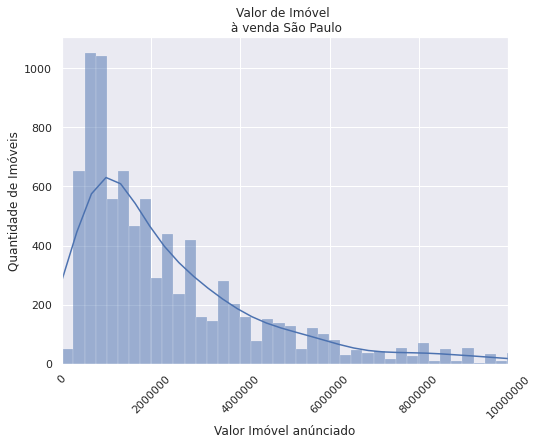

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize = (8,6))
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

hist = sns.histplot(data = df_vendas, x = 'Valor_Anunciado', kde=True, )
hist.set(title="Valor de Imóvel \n à venda São Paulo",xlabel= "Valor Imóvel anúnciado", ylabel="Quantidade de Imóveis")
plt.xlim((-50,10000000))
plt.show()

In [14]:
metragem_bairro = df_vendas.groupby('Bairro').mean()

In [15]:
df_vendas.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anunciado,Tipo_Anuncio
2400,NaN,Instituto de Previdência,São Paulo,450,5,5,3,R$ 1.355.010,R$,1355010.00,None
6603,Rua Doutor Carneiro Maia,Vila Água Funda,São Paulo,143,2,2,2,R$ 850.000,R$,850000.00,None
8326,"Rua Santa Beatriz, , 147",Jardim Ibitirama,São Paulo,100,3,2,4,R$ 890.000,R$,890000.00,None
2414,Rua Barão do Bananal,Vila Pompéia,São Paulo,111,3,2,2,R$ 920.000,R$,920000.00,None
7545,NaN,Bosque da Saúde,São Paulo,288,3,1,6,R$ 1.200.000,R$,1200000.00,None
2172,Rua José de Freitas Guimarães,Pacaembu,São Paulo,424,4,2,6,R$ 2.700.000,R$,2700000.00,None
3389,Rua Alberto Hodge,Santo Amaro,São Paulo,885,4,5,3,R$ 3.500.000,R$,3500000.00,None
4190,NaN,Jardim Paulista,São Paulo,612,4,3,3,R$ 20.640.000,R$,20640000.00,None
6354,"Rua Bastos Pereira, 267",Vila Nova Conceição,São Paulo,440,4,4,3,R$ 7.000.000,R$,7000000.00,None
5106,Rua Visconde de Ourem,Jardim Aeroporto,São Paulo,100,2,2,1,R$ 490.000,R$,490000.00,None


In [16]:

metragem_bairro['Valor_Metro_Quadrado'] = metragem_bairro['Valor_Anunciado'] / metragem_bairro['Metragem']

In [17]:
metragem_bairro.nlargest(10,'Valor_Anunciado')

,Metragem,Quartos,Banheiros,Vagas,Valor_Anunciado,Valor_Metro_Quadrado
Bairro,,,,,,
Jardim América,646.31,4.04,5.08,7.13,16427596.64,25417.48
Jardim Teresa,648.33,5.00,6.00,6.00,14836666.67,22884.32
Chácara Flora,1251.44,4.78,6.22,6.89,13500000.00,10787.53
Retiro Morumbi,1136.39,4.74,7.65,9.65,12002608.70,10562.04
Jardim Europa,566.18,3.79,4.73,5.03,11496061.43,20304.57
Jardim Luzitânia,499.10,3.53,4.91,4.32,8465344.83,16961.10
Jardins,602.86,4.29,4.86,5.57,8157142.86,13530.81
Morro dos Ingleses,466.67,4.00,3.33,8.67,8100000.00,17357.14
Jardim Paulista,489.79,3.86,4.63,4.40,8030379.70,16395.70


In [34]:
metragem_bairro.nlargest(11,'Valor_Metro_Quadrado')['Valor_Metro_Quadrado'].index

Index(['Vila Guaca', 'Jardim América', 'Jardim Teresa', 'Jardim Europa',
       'Vila Nova Conceição', 'Morro dos Ingleses', 'Jardim Luzitânia',
       'Jardim Paulista', 'Jardim Paulistano', 'São Judas'],
      dtype='object', name='Bairro')

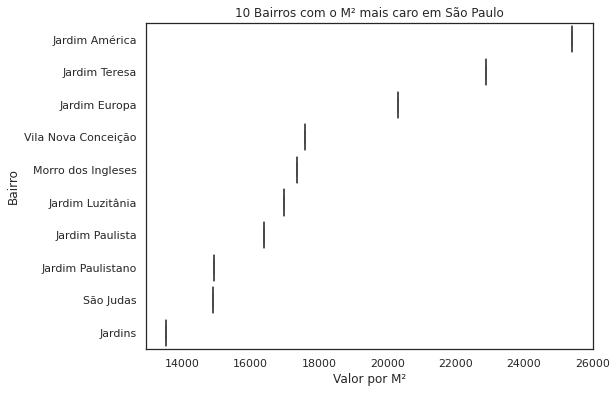

In [44]:

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(8, 6))

# Gráfico de Dispersão
#sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
#Não peguei o primeiro porque ele é um outlier
g = sns.boxplot(x=metragem_bairro.nlargest(11,'Valor_Metro_Quadrado')['Valor_Metro_Quadrado'][1:],y=metragem_bairro.nlargest(11,'Valor_Metro_Quadrado')['Valor_Metro_Quadrado'].index[1:])

g.set(xlabel = "Valor por M²", ylabel = "Bairro", title = "10 Bairros com o M² mais caro em São Paulo")
plt.show()

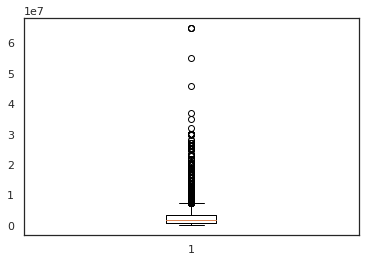

In [50]:
ax = plt.boxplot(df_vendas['Valor_Anunciado'])
plt.show()